In [1]:
!pip install binance_historical_data mplfinance darts stable-baselines3 backtesting tensorboard binance

In [2]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

data_dumper.dump_data(tickers=["NEARUSDT"])

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download: 0files [00:00, ?files/s]

daily files to download: 0files [00:00, ?files/s]

Tried to dump data for 1 tickers:
---> For NEARUSDT new data saved for: 0 months 0 days


In [3]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df], ignore_index=True)
df = df.sort_values(by="Open time")
df

/tmp/ipykernel_101047/2473667814.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
388571,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
388572,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
388573,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
388574,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
388575,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
545226,1696118100000,1.1340,1.1340,1.1330,1.1330,431.60,1696118159999,4.891148e+02,6,112.00,127.008000,0
545227,1696118160000,1.1330,1.1340,1.1330,1.1330,32.20,1696118219999,3.649300e+01,4,10.40,11.793600,0
545228,1696118220000,1.1340,1.1340,1.1330,1.1330,38.50,1696118279999,4.364250e+01,3,22.00,24.948000,0
545229,1696118280000,1.1330,1.1340,1.1330,1.1340,28.10,1696118339999,3.185510e+01,2,17.80,20.185200,0


In [4]:
OHLC_COLUMNS = [
    "Open",
    "High",
    "Low",
    "Close"]
dataset = df.loc[:, OHLC_COLUMNS].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=OHLC_COLUMNS)


def add_features(df):
    df = df.copy()
    # add technical indicators to dataset
    df['SMA_256'] = df['Close'].rolling(window=256).mean()
    df['SMA_512'] = df['Close'].rolling(window=512).mean()
    df['SMA_1024'] = df['Close'].rolling(window=1024).mean()

    # convert SMA columns to distance in percentages from "Close"
    df['SMA_256'] = ((df['Close'] - df['SMA_256']) / df['SMA_256'])
    df['SMA_512'] = ((df['Close'] - df['SMA_512']) / df['SMA_512'])
    df['SMA_1024'] = ((df['Close'] - df['SMA_1024']) / df['SMA_1024'])

    # drop NaN rows resulting from the SMA calculations
    df.dropna(inplace=True)
    return df


dataset = add_features(dataset)
dataset

,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
1023,1.1284,1.1293,1.1284,1.1293,0.027575,-0.002864,-0.033380
1024,1.1284,1.1309,1.1284,1.1309,0.029032,-0.001275,-0.031812
1025,1.1310,1.1361,1.1310,1.1361,0.033741,0.003445,-0.027268
1026,1.1362,1.1364,1.1337,1.1364,0.033990,0.003865,-0.026914
1027,1.1375,1.1382,1.1356,1.1376,0.035056,0.005082,-0.025857
...,...,...,...,...,...,...,...
1556351,1.1340,1.1340,1.1330,1.1330,-0.003504,-0.005423,-0.004060
1556352,1.1330,1.1340,1.1330,1.1330,-0.003470,-0.005404,-0.004058
1556353,1.1340,1.1340,1.1330,1.1330,-0.003432,-0.005385,-0.004057
1556354,1.1330,1.1340,1.1330,1.1340,-0.002522,-0.004494,-0.003179


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class MultiScaler:
    def __init__(self, min_max: MinMaxScaler, std: StandardScaler):
        self.min_max = min_max
        self.std = std


def preprocess(df: pd.DataFrame, scaler=None):
    # Apply percentage change only to OHLC columns
    df_pct = df[OHLC_COLUMNS].pct_change()

    # Clamp
    df_pct.clip(lower=-0.1, upper=0.1, inplace=True)

    # Concatenate the percentage-changed OHLC with the other columns
    df_all = pd.concat([df_pct, df.drop(columns=OHLC_COLUMNS)], axis=1)

    # Drop NA values (from pct_change operation)
    df_all.dropna(inplace=True)

    # Apply MinMax scaling to all columns
    if scaler is None:
        scaler = MultiScaler(MinMaxScaler(feature_range=(-1, 1), copy=False), StandardScaler(copy=False))
        df_multi_scaled = scaler.min_max.fit_transform(scaler.std.fit_transform(df_all))
    else:
        df_multi_scaled = scaler.min_max.transform(scaler.std.transform(df_all))

    df_scaled = pd.DataFrame(df_multi_scaled.copy(),
                             columns=df_all.columns,
                             index=df_all.index)

    return df_scaled, scaler


def invert_preprocess(original_start, scaler: MultiScaler, df):
    df = df.copy()
    
    original_start = original_start[OHLC_COLUMNS].to_numpy()
    # Invert MinMax scaling for all columns
    df_inv_scaled = pd.DataFrame(scaler.std.inverse_transform(scaler.min_max.inverse_transform(df.to_numpy())),
                                 columns=df.columns,
                                 index=df.index)

    # Recover the original OHLC values
    reversed_array = np.cumprod(1 + df_inv_scaled[OHLC_COLUMNS].to_numpy(), axis=0)
    reversed_array = reversed_array * original_start  # Scaling by the original_start to each element

    df_inv_scaled[OHLC_COLUMNS] = reversed_array

    return df_inv_scaled


preprocessed_dataset, scaler = preprocess(dataset)

# transform dataset so that all transform-invert transform pairs are idempotent
# dataset = invert_preprocess(dataset.iloc[0], scaler, preprocessed_dataset)
# dataset = add_features(dataset)

preprocessed_dataset

,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
1024,1.396588e-16,1.416807e-02,7.281434e-17,-0.003740,-0.246520,-0.283731,-0.298767
1025,2.304147e-02,4.598108e-02,2.304147e-02,0.028651,-0.238204,-0.275479,-0.291010
1026,4.597701e-02,2.640613e-03,2.387268e-02,-0.015477,-0.237763,-0.274744,-0.290407
1027,1.144165e-02,1.583949e-02,1.675928e-02,-0.007414,-0.235881,-0.272617,-0.288602
1028,7.032967e-03,5.798629e-02,7.044734e-03,0.046276,-0.224408,-0.261230,-0.277957
...,...,...,...,...,...,...,...
1556351,8.826125e-03,8.826125e-03,7.281434e-17,-0.018165,-0.303977,-0.290982,-0.251390
1556352,-8.818342e-03,1.082491e-16,7.281434e-17,-0.018165,-0.303917,-0.290949,-0.251387
1556353,8.826125e-03,1.082491e-16,7.281434e-17,-0.018165,-0.303850,-0.290916,-0.251385
1556354,-8.818342e-03,1.082491e-16,7.281434e-17,-0.009179,-0.302243,-0.289358,-0.249886


In [6]:
from sklearn.metrics import mean_absolute_error


def test_preprocess_invert_preprocess(original_df):
    preprocessed_df, scaler = preprocess(original_df)

    # Assume that 'original_start' is the first row of the original DataFrame
    original_start = original_df.iloc[0]

    inverted_df = invert_preprocess(original_start, scaler, preprocessed_df)

    mae_list = []
    for col in original_df.columns:
        # Start from the second row of the original_df for comparison
        mae = mean_absolute_error(original_df.iloc[1:][col], inverted_df[col])
        mae_list.append(mae)
        print(f"Mean Absolute Error for {col}: {mae}")

    avg_mae = sum(mae_list) / len(mae_list)
    print(f"Average MAE: {avg_mae}")

    return avg_mae < 1e-9


# Assuming 'dataset' is your original DataFrame
test_preprocess_invert_preprocess(dataset)


def test_orig_val():
    # The original_start passed to invert_preprocess() must be the first value in the corresponding
    # original DataFrame segment. For the first range, that's range_orig.iloc[0].
    # For the second range, it's range_orig.iloc[500].

    range_orig = dataset.iloc[2000:3000]
    range_preproc, s = preprocess(range_orig)

    # Inverted for the whole preprocessed range
    range1_inv = invert_preprocess(range_orig.iloc[0], s, range_preproc)

    # Inverted for the latter part of the preprocessed range
    range2_inv = invert_preprocess(range_orig.iloc[500], s, range_preproc.iloc[500:])

    # Due to floating point errors, equality may not be exact. So you might use pd.testing.assert_frame_equal
    # with the check_exact=False parameter
    pd.testing.assert_frame_equal(range1_inv.iloc[500:].reset_index(drop=True),
                                  range2_inv.reset_index(drop=True), check_exact=False)


test_orig_val()

Mean Absolute Error for Open: 1.126746228170941
Mean Absolute Error for High: 1.3774208346802361
Mean Absolute Error for Low: 0.8126206151996662
Mean Absolute Error for Close: 1.1374322405318922
Mean Absolute Error for SMA_256: 7.719346291693844e-18
Mean Absolute Error for SMA_512: 7.528852298967623e-18
Mean Absolute Error for SMA_1024: 6.083953981280191e-18
Average MAE: 0.636317131226105


<Axes: xlabel='time'>

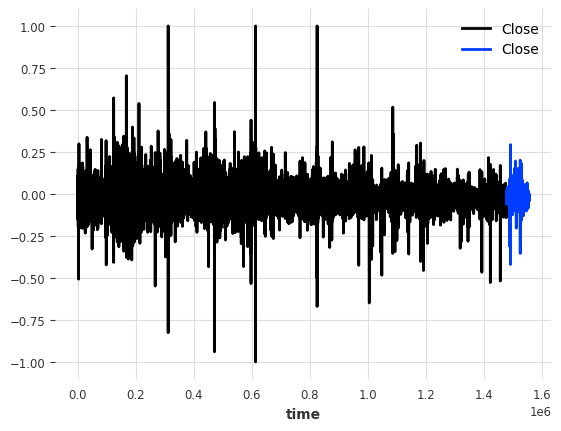

In [7]:
import numpy as np
import pandas as pd

from darts import TimeSeries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(preprocessed_dataset)
target_train, target_val = target_series.split_after(0.95)

target_train["Close"].plot()
target_val["Close"].plot()

In [8]:

from darts.utils.likelihood_models import QuantileRegression
from darts.models import TFTModel

SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=64,
#     n_rnn_layers=4,
#     dropout=0.1,
#     batch_size=4096,
#     n_epochs=10,
#     # optimizer_kwargs={"lr": 1e-3},
#     # random_state=0,
#     training_length=SEQUENCE_LENGTH,
#     input_chunk_length=SEQUENCE_LENGTH,
#     # likelihood=GaussianLikelihood(),
# )

my_model = TFTModel(
    input_chunk_length=SEQUENCE_LENGTH,
    output_chunk_length=PREDICTION_LENGTH,
    hidden_size=128,
    lstm_layers=2,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=512,
    n_epochs=1,
    add_relative_index=True,
    add_encoders=None,
    random_state=42,
    categorical_embedding_sizes={},
    likelihood=QuantileRegression(),
)

TFTMODEL_PATH = "model-weights-1694211368.0068371.pt"
my_model.load_weights(TFTMODEL_PATH)
# my_model = RNNModel.load("model-weights-1694033110.215867.pt")

# my_model.fit(target_train, val_series=target_val, verbose=True)

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# import time
# import os
# try:
#   os.makedirs("./drive/MyDrive/colab/model-weights/")
# except:
#   pass
# my_model.save(f"./drive/MyDrive/colab/model-weights/model-weights-{time.time()}.pt")

In [10]:
from darts.metrics import mse


def backtest(testing_model, series):
    # Compute the backtest predictions with the two models
    pred_err = testing_model.backtest(
        series=series,
        forecast_horizon=PREDICTION_LENGTH,
        stride=10,
        retrain=False,
        verbose=False,
        metric=mse
    )
    print("MSE:", pred_err)

# backtest(my_model, target_val)

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

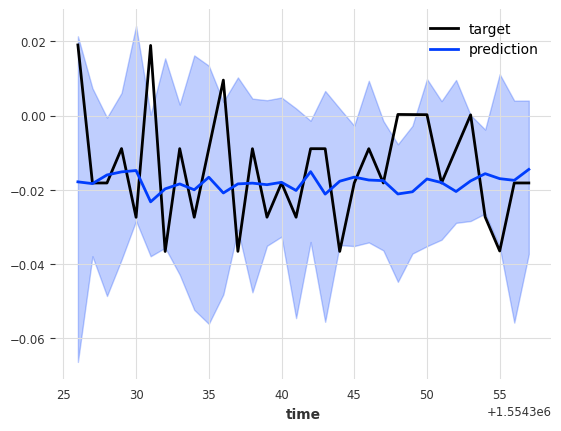

In [11]:
OFFSET_BACK = 2030
predict_X = target_series[-SEQUENCE_LENGTH - OFFSET_BACK:-OFFSET_BACK]
assert len(predict_X) == SEQUENCE_LENGTH
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X, num_samples=32)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")

In [12]:
original_start_pred = dataset.loc[predict_X[-1].time_index.start]
inverted_pred = invert_preprocess(original_start_pred, scaler, pred.mean().pd_dataframe())
inverted_pred

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1554326,1.094446,1.096145,1.093969,1.095165,-0.012296,-0.011634,-0.012144
1554327,1.095288,1.096620,1.093987,1.095218,-0.013821,-0.012559,-0.012128
1554328,1.094998,1.096820,1.094942,1.095046,-0.012765,-0.012582,-0.010059
1554329,1.095066,1.096737,1.094916,1.095389,-0.013321,-0.011533,-0.010690
1554330,1.095703,1.096395,1.094693,1.096180,-0.013264,-0.012839,-0.011143
1554331,1.095861,1.096190,1.095003,1.095925,-0.012684,-0.012866,-0.010096
1554332,1.096417,1.095985,1.094971,1.096303,-0.013143,-0.013166,-0.010675
1554333,1.096661,1.096288,1.095252,1.096234,-0.011175,-0.011718,-0.011903
1554334,1.097194,1.096363,1.095251,1.096267,-0.013641,-0.011406,-0.011009


In [13]:
PLOT_BEFORE_PREDICTION = int(PREDICTION_LENGTH / 2)
start_idx = predict_X[-1].time_index.start
original_start_tg = dataset.loc[start_idx - PLOT_BEFORE_PREDICTION]
index = target_series.time_index.intersection(pred.time_index)
index = index.union(index - PLOT_BEFORE_PREDICTION)
inverted_target = invert_preprocess(original_start_tg, scaler, target_series[index].pd_dataframe())
inverted_target

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1554310,1.105,1.105,1.104,1.104,-0.004435,-0.003896,-0.001754
1554311,1.105,1.106,1.105,1.105,-0.003523,-0.002996,-0.000855
1554312,1.104,1.105,1.104,1.104,-0.004407,-0.003898,-0.001764
1554313,1.104,1.105,1.104,1.105,-0.003495,-0.002998,-0.000866
1554314,1.104,1.105,1.104,1.105,-0.003484,-0.002998,-0.000872
1554315,1.104,1.104,1.104,1.104,-0.004368,-0.003898,-0.001781
1554316,1.104,1.105,1.104,1.104,-0.004354,-0.003898,-0.001785
1554317,1.104,1.104,1.104,1.104,-0.004340,-0.003898,-0.001787
1554318,1.104,1.104,1.103,1.103,-0.005225,-0.004799,-0.002694


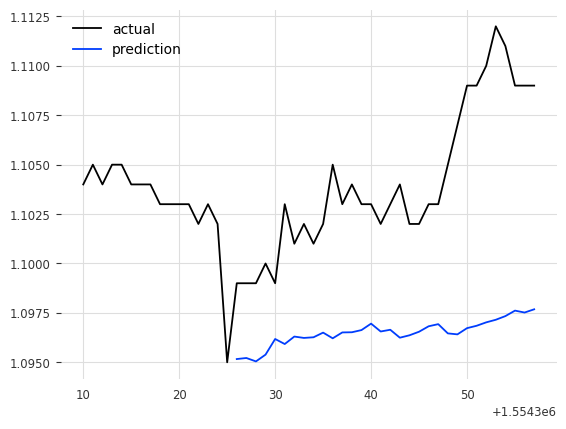

In [14]:
# from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt

# import matplotlib.dates as mdates

# Create a DataFrame from the 'candlesticks' array
candlesticks_df = pd.DataFrame(inverted_target, columns=OHLC_COLUMNS)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=OHLC_COLUMNS)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# # Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close']]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 10))
# 
# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()

In [15]:
%load_ext tensorboard
%tensorboard --logdir tensorboard

Launching TensorBoard...

In [16]:
from stable_baselines3.common.vec_env import SubprocVecEnv
import time
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import random
import gymnasium as gym
from gymnasium import spaces
import torch


def calculate_observation(df, model, scaler, buy_price):
    MODEL_INPUT_IN_OBSERVATION = 64

    df_with_features = add_features(df)

    original_start = df_with_features.iloc[-1]
    df_preprocessed, _ = preprocess(df_with_features, scaler)

    # X = TimeSeries.from_dataframe(df_preprocessed[-SEQUENCE_LENGTH:])
    # y = model.predict(PREDICTION_LENGTH, X, verbose=False, num_samples=8)

    # y_mean = y.mean()

    # y_inverted = invert_preprocess(original_start, scaler, y_mean.pd_dataframe())
    # y_max_close = y_inverted.Close.mean()
    curr_close = original_start.Close
    prev_close = df_with_features.iloc[-2].Close

    # y_std = y.std().pd_dataframe().Close.mean()
    # predicted_gain = (y_max_close - curr_close) / curr_close
    current_gain = ((curr_close - buy_price) / buy_price) if buy_price is not None else 0
    previous_prices = df_preprocessed.iloc[-MODEL_INPUT_IN_OBSERVATION:].to_numpy().flatten()
    # model_output = y_mean[:MODEL_INPUT_IN_OBSERVATION].pd_dataframe().Close.to_numpy().flatten()
    buy_status = 1 if buy_price is not None else 0
    # observation = np.concatenate(
    #     [last_32, model_output, [predicted_gain], [buy_status], [y_std], [current_gain]]).astype(np.float32)
    observation = np.concatenate(
        [previous_prices, [buy_status], [current_gain]]).astype(np.float32)

    return observation, curr_close, prev_close


class CustomEnv(gym.Env):
    SKIP_STEPS = 1200

    def __init__(self, dataset: pd.DataFrame, my_model: TFTModel, scaler: MultiScaler, episode_length=512,
                 commission=0.001):
        super().__init__()

        self.commission = commission

        # 0: hold; 1: buy; 2: sell
        self.action_space = spaces.Discrete(3)

        self.NUM_FEATURES = calculate_observation(dataset, my_model, scaler, False)[0].shape[0]
        print(f"obs length = {self.NUM_FEATURES}")

        # Update the observation space to include extra information
        self.observation_space = spaces.Box(low=-1, high=1,
                                            shape=(self.NUM_FEATURES,),
                                            dtype=np.float32)

        self.dataset = dataset
        self.my_model = my_model
        self.scaler = scaler
        self.episode_length = episode_length
        self.current_step = 0
        self.start_index = 0
        self.buy_price = None

    def step(self, action):
        self.current_step += 1

        # Calculate the current observation
        observation, curr_close, prev_close = self.calculate_observation(self.current_step)

        # Initialize reward and info
        reward = 0

        # Give small rewards or penalties for holding
        if self.buy_price is not None:
            change = (curr_close - prev_close) / prev_close
            if abs(change) > 0.001:
                if change > 0:
                    reward += 0.01  # small reward for holding when price increases
                elif change < 0:
                    reward -= 0.015  # small penalty for holding when price decreases

        # Action logic
        if self.buy_price is None:
            if action == 1:  # Buy
                self.buy_price = curr_close
        else:
            sell_fee = curr_close * (1 - self.commission)
            buy_fee = self.buy_price * (1 + self.commission)
            gain_from_trade_fee = (sell_fee - buy_fee) / buy_fee
            if action == 2:  # Sell
                self.buy_price = None
                # Large reward for a profitable sell
                reward += gain_from_trade_fee * 4

        info = {}
        terminated = self.current_step >= self.episode_length
        return observation, reward, terminated, False, info

    def reset(self, seed=None, options=None):
        self.current_step = 0
        self.buy_price = None
        self.start_index = random.randint(self.SKIP_STEPS, len(self.dataset) - self.episode_length - 1)
        observation, _, _ = self.calculate_observation(self.current_step)
        info = {}
        return observation, info

    def render(self):
        pass

    def close(self):
        pass

    def calculate_observation(self, current_step):
        index_start = self.start_index + current_step - self.SKIP_STEPS
        index_end = self.start_index + current_step

        df = self.dataset.iloc[index_start:index_end]
        observation, curr_close, prev_close = calculate_observation(df, self.my_model, self.scaler, self.buy_price)

        return observation, curr_close, prev_close


from stable_baselines3.common.env_checker import check_env

env = CustomEnv(dataset, my_model, scaler)
check_env(env)
del env

env = make_vec_env(lambda: CustomEnv(dataset, my_model, scaler), n_envs=20, seed=42, vec_env_cls=SubprocVecEnv)

policy_kvargs = dict(activation_fn=torch.nn.LeakyReLU,
                     net_arch=[dict(pi=[256, 256, 256, 256], vf=[256, 256, 256, 256])])
# {'gamma': 0.8, 'ent_coef': 0.02, 'gae_lambda': 0.92}
rl_model = PPO("MlpPolicy", env,
               verbose=1,
               tensorboard_log="./tensorboard/",
               ent_coef=0.02,
               gae_lambda=0.92,
               gamma=0.8,
               policy_kwargs=policy_kvargs)
# rl_model.set_parameters("rl-model-best-model/best_model/best_model.zip")

obs length = 450


/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipykernel_101047/473305505.py:31: RuntimeWarning: divide by zero encountered in scalar divide
/tmp/ipyke

Using cuda device


RuntimeError: Error(s) in loading state_dict for ActorCriticPolicy:
	size mismatch for mlp_extractor.policy_net.0.weight: copying a param with shape torch.Size([256, 258]) from checkpoint, the shape in current model is torch.Size([256, 450]).
	size mismatch for mlp_extractor.value_net.0.weight: copying a param with shape torch.Size([256, 258]) from checkpoint, the shape in current model is torch.Size([256, 450]).

In [ ]:
# # Define hyperparameter search space
# gammas = [0.8, 0.9, 0.95]
# ent_coefs = [0.005, 0.01, 0.02]
# gae_lambdas = [0.9, 0.92, 0.95]
# best_reward = float('-inf')
# best_params = None
# 
# 
# # Evaluation function placeholder. Implement this based on your specific needs.
# def evaluate_model(model, env, num_episodes=10):
#     total_rewards = 0
#     for _ in range(num_episodes):
#         obs, _ = env.reset()
#         terminated = False
#         truncated = False
#         episode_reward = 0
#         while not (terminated or truncated):
#             action, _states = model.predict(obs)
#             obs, reward, terminated, truncated, info = env.step(action)
#             episode_reward += reward
#         total_rewards += episode_reward
#     mean_reward = total_rewards / num_episodes
#     return mean_reward
# 
# 
# # Perform the search
# for gamma in gammas:
#     for ent_coef in ent_coefs:
#         for gae_lambda in gae_lambdas:
#             print(f"Training with gamma={gamma}, ent_coef={ent_coef}, gae_lambda={gae_lambda}")
# 
#             random.seed(42)
#             rl_model = PPO("MlpPolicy", env,
#                            verbose=1,
#                            ent_coef=ent_coef,
#                            gamma=gamma,
#                            gae_lambda=gae_lambda)
# 
#             # Learn and evaluate the model (simplified)
#             rl_model.learn(total_timesteps=5000)
#             mean_reward = evaluate_model(rl_model, env)  # You'll need to define this function
# 
#             print(f"Mean reward: {mean_reward}")
# 
#             if mean_reward > best_reward:
#                 best_reward = mean_reward
#                 best_params = {'gamma': gamma, 'ent_coef': ent_coef, 'gae_lambda': gae_lambda}
# 
# print(f"Best params: {best_params}, Best reward: {best_reward}")

In [ ]:
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback

checkpoint_callback = CheckpointCallback(
    save_freq=50_000,
    save_path="rl-model-checkpoints/",
    name_prefix="rl_model",
    verbose=1,
    save_vecnormalize=True,
    save_replay_buffer=True
)
eval_env = CustomEnv(dataset, my_model, scaler, episode_length=2048)
eval_callback = EvalCallback(eval_env, best_model_save_path="rl-model-best-model/best_model",
                             log_path="rl-model-best-model/results", eval_freq=50_000, verbose=1,
                             n_eval_episodes=5)

rl_model.learn(total_timesteps=1_000_000, callback=[checkpoint_callback, eval_callback])

In [ ]:
evaluations = np.load("rl-model-best-model/results/evaluations.npz")
evaluations_df = pd.DataFrame()
evaluations_df["timesteps"] = evaluations["timesteps"]
evaluations_df["results"] = evaluations["results"].mean(axis=1)
evaluations_df

In [ ]:
# backtesting

from backtesting import Backtest, Strategy, set_bokeh_output


class NeuralNetStrat(Strategy):
    def __init__(self, broker, data, params):
        super().__init__(broker, data, params)
        self.buy_price = None
        self.expected_gain = None

    def init(self):
        pass

    def next(self):
        if len(self.data) > 1200:
            df = self.data.df.iloc[-1200:].copy()
            df.drop(columns=["Volume"], inplace=True)
            observation, curr_close, _ = calculate_observation(df, my_model, scaler, self.buy_price)

            action, _ = rl_model.predict(observation, deterministic=True)
            if self.buy_price is None:
                if action == 1:
                    self.buy()
                    print(f"buy")
                    self.buy_price = curr_close
            else:
                if action == 2:
                    commission = 0.001
                    sell_fee = curr_close * (1 - commission)
                    buy_fee = self.buy_price * (1 + commission)
                    gain_from_trade_fee = (sell_fee - buy_fee) / buy_fee
                    print(f"gain {gain_from_trade_fee}")
                    self.sell()
                    self.buy_price = None


backtest_dataset = dataset[-20000:]
backtest_dataset["Volume"] = df[1023:]["Volume"]
bt = Backtest(backtest_dataset, NeuralNetStrat, commission=.001,
              exclusive_orders=True)
stats = bt.run()
stats

In [ ]:
set_bokeh_output(notebook=False)
bt.plot()